![](https://cdn-images-1.medium.com/max/2000/1*_nBkR9sW8uqWvSerATmLXA.jpeg)

# 1. INTRODUCTION
---
    Seaborn에서 제공하는 MPG 데이터를 이용하여 자동차에 관련된 정보들로 부터 MPG(갤런당 마일)를 예측하고자 한다. 
    MPG는 miles per gallon의 약어로써 동일한 연료의 양으로 얼마나 많이 움직이는냐이다. 

## 1.1 AUTO-MGP dataset
---
    이 자료는 카네기 멜론 대학교(Carnegie Mellon University)에서 관리되는 StatLib에 보관되어 있으며, 1983년 Data Exposition (American Statistical Association에 주최)에서 사용되었으며, Ernesto Ramos and David Donoho가 자동차의 MPG(miles per gallon), 실린더, 배기량 등에 관한 8개의 변수와 406개의 다른 차량을 수집하였다. 이후 Rang Quinlan(1993)에 MPG 속성에서 8개의 값이 알수 없기 때문에 제거되어 총 398개의 자료를 가지고 있다.
    
    
<출처: http://stat-computing.org/dataexpo/1983.html>

## 1.2 Dataset Attribute Information
---
이름 | 설명 | 속성 
:---|:---|:---
mpg | 갤런당 마일, target | continuous 
cylinders | 실린더 수 | multi-valued discrete 
displacement | 배기량 | continuous 
horsepower | 마력 | continuous 
weight | 무게 | continuous 
acceleration | 가속 | continuous
model year | 자동차 모델연도(연식) | multi-valued discrete, order
origin | 원산지 | multi-valued discrete 
name | 자동차 이름 | string (unique for each instance)


    1) 갤런 : 갤런(gallon)은 부피를 재는 단위로, 일반적으로 미국 액체량 갤런을 쓰며 1갤런은 3.785411784리터이다.
    2) 마일 : 미국과 영국에서 주로 쓰는 길이 단위이며, 1마일은 약 1.6093킬로미터이다. 
    3) 실린더 : 엔진에서 실린터란 피스톤이 왕복운동을 하는 원통 모양의 부품이다. 
    4) 배기량 : 엔진의 여러개 실린더의 피스톤이 최대로 밀어내거나 빨아들이는 부피의 합으로, 우리나라에서는 표준단위 cc(세제곱센티미터, cubic centimetre)을 사용하지만 미국에서는  입방 인치 (Cubic Inch)를 사용한다. 
    5) 마력 : 단위 시간 당 일의 양으로 흔히 일률이라고 하며, 영국 기준으로 1 hp(horsepower) = 745.7W이다.

# 2. Preparations
---

seaborn에서 mpg데이터를 불러온다.

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns

In [0]:
#seaborn의 데이터셋을 불러온다.
mpg_df = sns.load_dataset('mpg')

# 3. Data Overview
---

우선 불러온 mpg데이터셋에 대한 간략한 개요를 보도록 하자.

In [3]:
mpg_df.shape

(398, 9)

변수는 총 9개이며, 데이터의 수는 398개 이다.

다음으로 데이터의 형태를 확인한다.

In [4]:
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## 3.1 Data preprocessing
---

In [6]:
# 결측치를 확인한다.
mpg_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

마력(horsepower)에는 6개의 결측치가 존재하는 것을 알 수 있다. 

이를 처리해보록 하자.

In [7]:
# 결측치를 제외한 자료를 만든다. 
mpg_df = mpg_df.dropna()
mpg_df.shape

(392, 9)

dropna함수를 통해 결측치가 존재하는 데이터는 제외하고 분석을 진행한다.

다음으로 name변수를 분석해보자.

In [8]:
mpg_df.name[:30]

0        chevrolet chevelle malibu
1                buick skylark 320
2               plymouth satellite
3                    amc rebel sst
4                      ford torino
5                 ford galaxie 500
6                 chevrolet impala
7                plymouth fury iii
8                 pontiac catalina
9               amc ambassador dpl
10             dodge challenger se
11              plymouth 'cuda 340
12           chevrolet monte carlo
13         buick estate wagon (sw)
14           toyota corona mark ii
15                 plymouth duster
16                      amc hornet
17                   ford maverick
18                    datsun pl510
19    volkswagen 1131 deluxe sedan
20                     peugeot 504
21                     audi 100 ls
22                        saab 99e
23                        bmw 2002
24                     amc gremlin
25                       ford f250
26                       chevy c20
27                      dodge d200
28                  

name변수는 "브랜드명칭 + 차종"과 같은 형태로 되어있다. <br>
이를 이용하여 name변수에서 브랜드명을 분리하여 Feature에 포함시키도록 한다.

In [9]:
mpg_df.loc[:,'car_brand'] = mpg_df['name'].str.split(n=2, expand=True)[0]
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,car_brand
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford


In [10]:
mpg_df.car_brand.value_counts().sort_index()

amc              27
audi              7
bmw               2
buick            17
cadillac          2
capri             1
chevroelt         1
chevrolet        43
chevy             3
chrysler          6
datsun           23
dodge            28
fiat              8
ford             48
hi                1
honda            13
maxda             2
mazda            10
mercedes          1
mercedes-benz     2
mercury          11
nissan            1
oldsmobile       10
opel              4
peugeot           8
plymouth         31
pontiac          16
renault           3
saab              4
subaru            4
toyota           25
toyouta           1
triumph           1
vokswagen         1
volkswagen       15
volvo             6
vw                6
Name: car_brand, dtype: int64

브랜드를 분리시켜 확인한 결과, 몇몇 브랜드는 같은 브랜드임에도 불구하고 다른 명칭으로 저장되어있다.
이를 변경시켜준다.

In [11]:
# 브랜드가 같으나 철자가 다른것을 바꾸어 준다.  예) chevrolet = chevroelt
mpg_df['car_brand'] = mpg_df['car_brand'].str.replace('chevroelt|chevrolet|chevy','chevrolet')
mpg_df['car_brand'] = mpg_df['car_brand'].str.replace('maxda|mazda','mazda')
mpg_df['car_brand'] = mpg_df['car_brand'].str.replace('mercedes|mercedes-benz|mercedes benz','mercedes')
mpg_df['car_brand'] = mpg_df['car_brand'].str.replace('mercedes-benz','mercedes')
mpg_df['car_brand'] = mpg_df['car_brand'].str.replace('toyota|toyouta','toyota')
mpg_df['car_brand'] = mpg_df['car_brand'].str.replace('vokswagen|volkswagen|vw','volkswagen')
mpg_df['car_brand'].value_counts().sort_index()

amc           27
audi           7
bmw            2
buick         17
cadillac       2
capri          1
chevrolet     47
chrysler       6
datsun        23
dodge         28
fiat           8
ford          48
hi             1
honda         13
mazda         12
mercedes       3
mercury       11
nissan         1
oldsmobile    10
opel           4
peugeot        8
plymouth      31
pontiac       16
renault        3
saab           4
subaru         4
toyota        26
triumph        1
volkswagen    22
volvo          6
Name: car_brand, dtype: int64

자동차 이름(name) 변수는 분석에 필요가 없으므로 제외시킨다.

In [12]:
mpg_df = mpg_df.drop('name', axis = 1)
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_brand
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford


다음으로 변수들의 데이터 타입을 확인해보도록 하자.

In [13]:
mpg_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
car_brand        object
dtype: object

mpg, 배기량(displacement), 마력(horsepower), 가속(acceleration)은 소수점을 포함한 숫자(float) 형식이며, 실런더수(cylinders), 무게(weight)는 정수(int), 연식(model_year)은 범주형변수이면서 순서척도로 확인되며, 원산지(origin)와 브랜드명(car_brand)은 명목척도이다. 

연식, 원산지와 브랜드명 변수에 대해서는 범주형 변수로 변환하는 작업이 필요하다.

In [0]:
num_feature_list = ['mpg','cylinders','displacement','horsepower','weight','acceleration']
cat_feature_list = ['model_year','origin','car_brand']

In [0]:
# feature 속성을 변경해 준다. 
mpg_df['model_year'] = pd.Categorical(mpg_df['model_year'], ordered=True)
mpg_df['origin'] = pd.Categorical(mpg_df['origin'], ordered=False)
mpg_df['car_brand'] = pd.Categorical(mpg_df['car_brand'], ordered=False)

In [16]:
mpg_df.dtypes

mpg              float64
cylinders          int64
displacement     float64
horsepower       float64
weight             int64
acceleration     float64
model_year      category
origin          category
car_brand       category
dtype: object

## 3.2 데이터 분포 확인
---
우선 연속형 데이터의 분포를 확인하도록 하자.

In [17]:
mpg_df[num_feature_list].describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


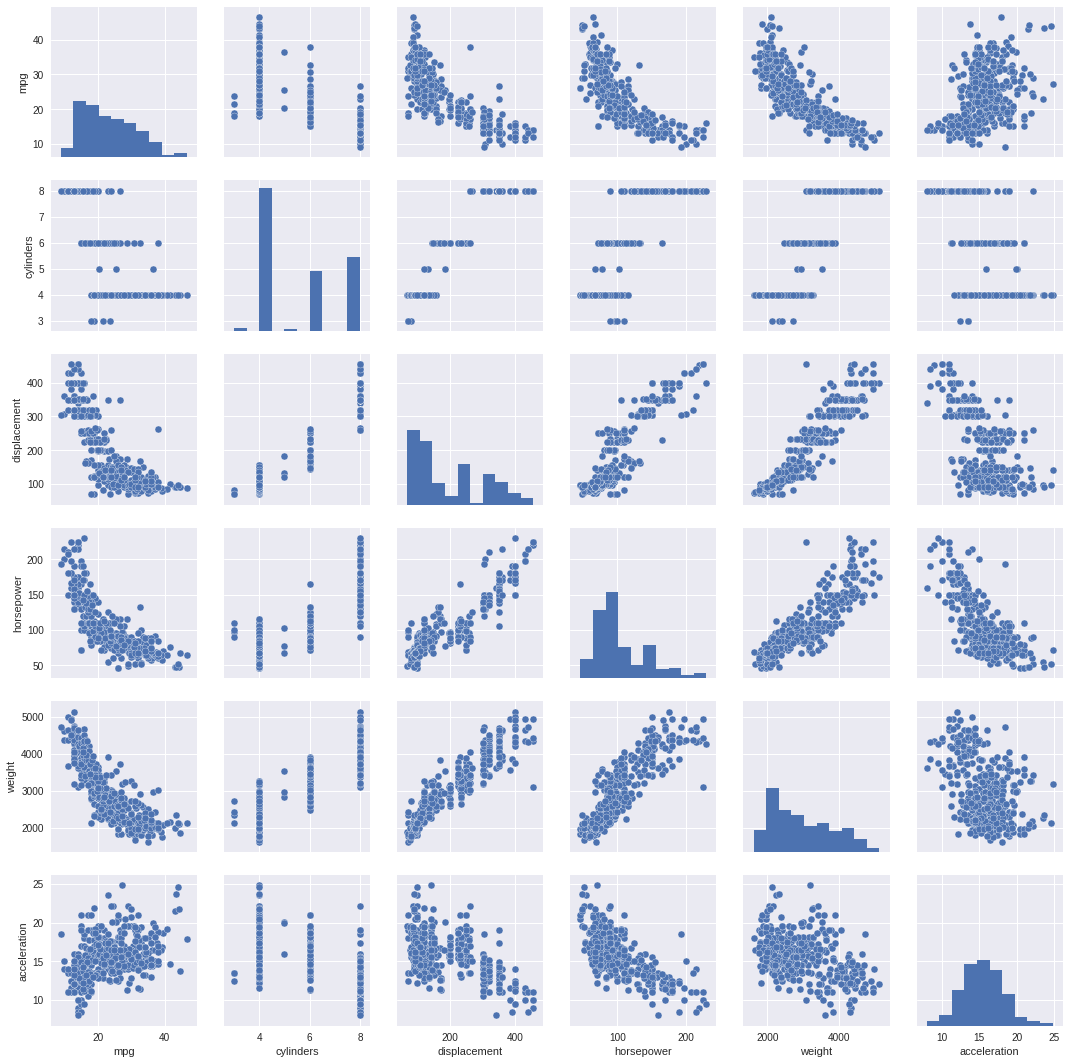

In [18]:
# 시각화 하여 확인한다. 테겟변수인 mpg와의 상관관계 확인
import matplotlib.pyplot as plt

sns.pairplot(mpg_df.filter(num_feature_list))
plt.show()

그래프로 보아 실린더 수, 배기량, 마력, 무게와 mpg는 음의 상관관계를 보이며, 가속은 mpg와 양의 상관관계임을 확인할 수 있다.

다음은 범주형 변수들의 분포를 확인하도록 하자.

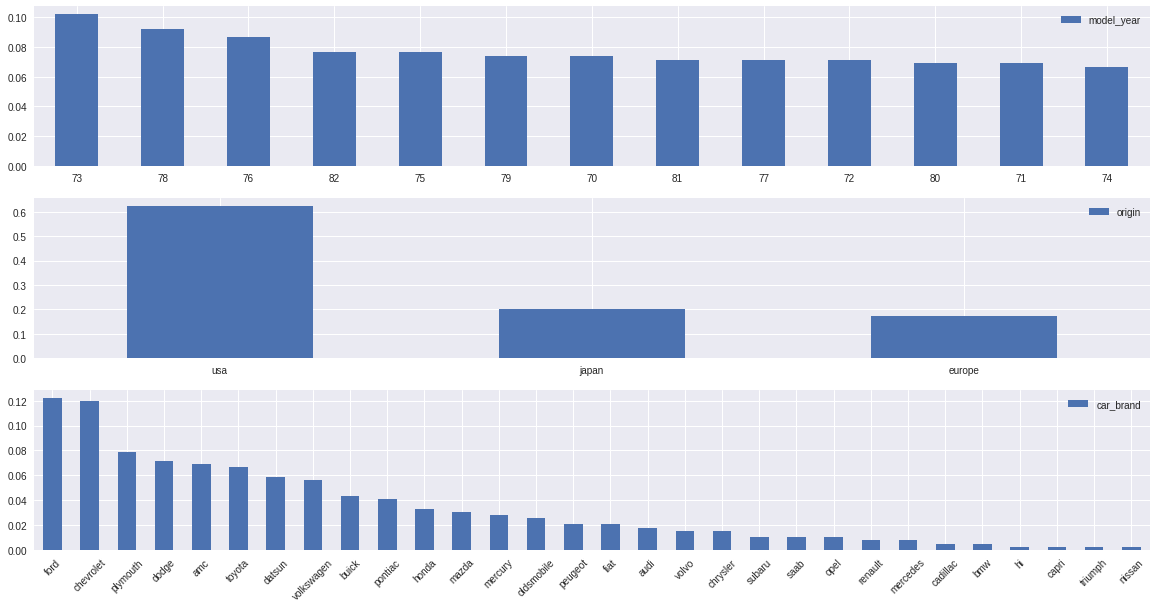

In [19]:
# 시각화 하여 확인한다.
fig, axs = plt.subplots(nrows=3, figsize=(20,10))
n = 0
for i in cat_feature_list:
  cnt_dt = pd.DataFrame(mpg_df[i].value_counts(normalize=True))
  cnt_dt.plot.bar(rot=0, ax=axs[n])
  plt.xticks(rotation=45)
  n += 1

73년도에 제작된 차량이 가장 많으며, 78년도, 76년도가 뒤를 따랐다. 원산지는 미국이 60%정도로 가장 많은 비율을 차지했으며, 일본과 유럽이 20%정도로 거의 비슷한 비율을 차지했다. 자동차 브랜드는 Ford사 차량이 가장 많은 비율을 차지했다.

## 3.3 데이터셋 분리하기
---
우선 범주형 변수에 대하여 더미변수를 만들어준다.

In [20]:
mpg_df_dm = pd.get_dummies(mpg_df)
mpg_df_dm.shape

(392, 52)

In [21]:
mpg_df_dm.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year_70,model_year_71,model_year_72,model_year_73,...,car_brand_peugeot,car_brand_plymouth,car_brand_pontiac,car_brand_renault,car_brand_saab,car_brand_subaru,car_brand_toyota,car_brand_triumph,car_brand_volkswagen,car_brand_volvo
0,18.0,8,307.0,130.0,3504,12.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165.0,3693,11.5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150.0,3436,11.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150.0,3433,12.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140.0,3449,10.5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


다음으로는 Target과 Feature를 분리한다.

In [0]:
target = mpg_df_dm['mpg']
features = mpg_df_dm.drop(columns=['mpg'], axis=1)

In [23]:
target.shape

(392,)

In [24]:
features.shape

(392, 51)

train_test_split을 이용하여 Train Data와 Test Data를 나눠준다.

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(294, 51)
(98, 51)
(294,)
(98,)


Train Data는 75%, Test Data는 25%의 비율로 분리하였다.

# 4. 모형 학습하기 
---

모형은 Ridge Regression과 Lasso Regression을 사용하였다.

**Ridge Regression**

Ridge Regression(능선회귀)는 계수의 크기에 패널티(penality)를 부과함으로써 최소자승법(Ordinary least squares, 오차의 제곱합을 최소가 되는 해를 구하는)의 문제를 해결한다. 

**Lasso Regression**

선형회귀의 L1 Regularization를 적용하는 대안으로
Objective = RSS + α * (sum of absolute value of coefficients)
계수를 0에 가깝게 만들려고 하며 이를 L1 규제라고 한다. 어떤계수는 0이 되기도 하는 이는 완전히 제외하는 변수(피쳐)가 생긴다는 뜻이다. 
alpha 기본값은 1.0이며, 과소 적합을 줄이기 위해서 이값을  줄여야한다. 

### STEP 1. base model
---
    학습할 모형에 아무런 매개변수를 주지 않는다. 즉, 디폴트로 설정된 구조를 이용하여 학습을 수행한다.

#### 1) Ridge
Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None, normalize=False, random_state=None, solver='auto', tol=0.001)


In [38]:
from sklearn.linear_model import Ridge
base_model = Ridge().fit(X_train, y_train)
print("Ridge Base model의 테스트 R^2값: {:.3f}".format(base_model.score(X_test, y_test)))

Ridge Base model의 테스트 R^2값: 0.856


Ridge Regression에 아무런 매개변수를 지정하지 않았을 경우, $R^{2}$는 0.856가 나왔다.

In [28]:
# MSE 계산
from sklearn.metrics import mean_squared_error
y_pred = base_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: {:.5f}".format(mse))

MSE: 8.58601


MSE는 8.58601가 나왔다. 

####  2) Lasso
Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection=’cyclic’)

In [29]:
from sklearn.linear_model import Lasso
base_model = Lasso().fit(X_train, y_train)
print("Lasso Base model의 테스트 R^2값: {:.3f}".format(base_model.score(X_test, y_test)))

Lasso Base model의 테스트 R^2값: 0.674


Lasso Regression에 아무런 매개변수를 지정하지 않았을 경우, $R^{2}$는 0.674가 나왔다.

In [30]:
# MSE 계산
y_pred = base_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: {:.5f}".format(mse))

MSE: 19.38021


MSE는 19.38021가 나왔다. 이제 이 스코어 이상의 모형을 만들어 보자.

### STEP 2. Grid search를 이용한 최적화 매개변수 찾기
---
    Grid search를 이용하여 매개변수를 변화시키면서 최적화 모형을 찾아보도록 하자.
    회귀모형의 매개변수 중 최적의 alpha를 찾는다.

In [31]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

alphas = np.array([25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01])

param_grid = [
              {'regressor':[Ridge()],
               'regressor__alpha':alphas},
              {'regressor':[Lasso()],
               'regressor__alpha':alphas}
             ]
KFold = KFold(n_splits=10)

pipe = Pipeline([('scaler', MinMaxScaler()), ('regressor', Ridge())])
pipe.fit(X_train, y_train)

## GridSeach : 회귀의 평가지표는 R^2이다. 
grid_ridge = GridSearchCV(pipe, param_grid=param_grid, scoring='r2', cv=KFold, verbose=1, return_train_score=True)

grid_result = grid_ridge.fit(X_train, y_train)

Fitting 10 folds for each of 26 candidates, totalling 260 fits


[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    1.9s finished


In [32]:
print("Grid search를 이용하여 구한 최적의 파라미터는 : {}".format(grid_result.best_params_))

Grid search를 이용하여 구한 최적의 파라미터는 : {'regressor': Lasso(alpha=0.02, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False), 'regressor__alpha': 0.02}


In [33]:
print("Grid search에 대한 R^2 값: {:.3f}".format(grid_result.best_score_))

Grid search에 대한 R^2 값: 0.821


테스트를 수행하여 스코어를 계산한다.

In [34]:
print("테스트 대한 R^2값: {:.3f}".format(grid_result.score(X_test, y_test)))

테스트 대한 R^2값: 0.856


In [35]:
# MSE 계산
import numpy as np
y_pred = grid_result.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
score = grid_result.score(X_test, y_test)
print("MSE: {:.5f}".format(mse))
print("Score: {:.3f}".format(score))

MSE: 8.57159
Score: 0.856


그래프를 이용하여 예측한 값과 테스트 값을 비교하여보자.

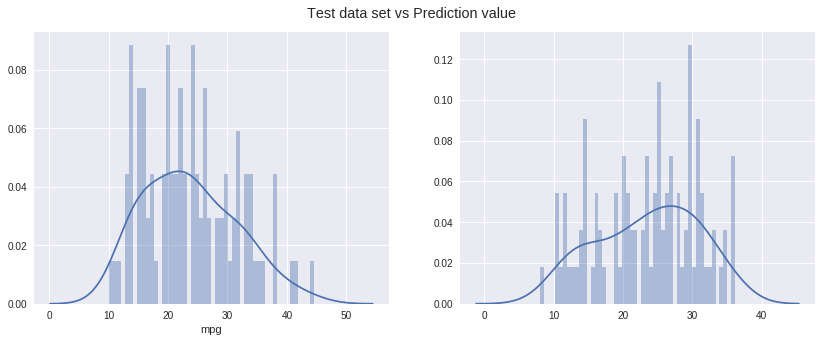

In [36]:
##예측값과 실제값 비교
y_pred = grid_result.predict(X_test)
fig,(ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(14,5)
sns.distplot(y_test, ax=ax1, bins=50)
fig.suptitle("Test data set vs Prediction value", y=0.95);
sns.distplot(y_pred, ax=ax2, bins=50)

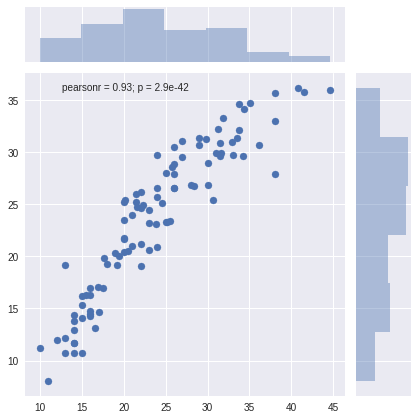

In [37]:
sns.jointplot(y_test.values, y_pred)

## Conclusion and discussion
---
    398개의 가 개별 자동차의 제원으로 동일한 연료의 양으로 얼마나 많이 움직이는지를 회귀모형을 이용하여 예측한 결과 0.85의 설명력을 얻었으며, 위에 보는 표와 같이 예측값과 실측값의 선형적 관계를 보였다. 
    
    그러나, 두가지 모형의 alpha를 변화 시켜서 찾은 최적 모형의 테스트 결과가 Base  model 의 성능에서 큰 변화는 보이지 않았다.

# 0. 번외
---
기본 성능이 좋은 모델을 찾기로 한다.

,R Square Score
Linear,0.852643
Ridge,0.855674
Bayesian Ridge,0.854147
Hubber,0.657347
Lasso,0.674230
Bagging,0.805918
RandomForest,0.783141
AdaBoost,0.755397
SVM RBF,0.024336
SVM Linear,0.359574


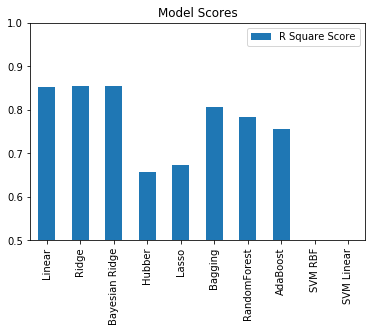

In [0]:
from sklearn import linear_model
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold

def select_model(X_train, y_train, X_test, y_test):
    results={}
             
    def test_model(clf):     
        base_model = clf.fit(X_train, y_train)
        return base_model.score(X_test, y_test)

    clf = linear_model.LinearRegression()
    results["Linear"]=test_model(clf)
    
    clf = linear_model.Ridge()
    results["Ridge"]=test_model(clf)
    
    clf = linear_model.BayesianRidge()
    results["Bayesian Ridge"]=test_model(clf)
    
    clf = linear_model.HuberRegressor()
    results["Hubber"]=test_model(clf)
    
    clf = linear_model.Lasso()
    results["Lasso"]=test_model(clf)
    
    clf = BaggingRegressor()
    results["Bagging"]=test_model(clf)
    
    clf = RandomForestRegressor()
    results["RandomForest"]=test_model(clf)
    
    clf = AdaBoostRegressor()
    results["AdaBoost"]=test_model(clf)
    
    clf = svm.SVR()
    results["SVM RBF"]=test_model(clf)
    
    clf = svm.SVR(kernel="linear")
    results["SVM Linear"]=test_model(clf)
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["R Square Score"] 
    results.plot(kind="bar",title="Model Scores")
    axes = plt.gca()
    axes.set_ylim([0.5,1])
    return results

select_model(X_train, y_train, X_test, y_test)

매개변수를 모두 Default로 했을때 선형회귀에 속하는 Ridge, Bayesian Ridge, Linear가 뛰어난 성능을 보였다. 이 예제에 사용된 자료는 각 feature과 선형적 관계를 보여 선형기반의 모형이 우수한 성능을 보였다. 그러나 각 자료의 특징마다 우수한 성능을 가지는 모형이 다를수 있으므로 여러방법으로 모형을 구현하여야 한다.